In [21]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from classic_backpropagation_scratch import NeuralNetwork
import matplotlib.pyplot as plt

In [22]:
# Load and prepare the Iris dataset
iris = load_iris()
X = iris.data  # Features
y = iris.target.reshape(-1, 1)  # Labels

# One-hot encode the labels for multi-class classification
encoder = OneHotEncoder(sparse_output=False)
y_onehot = encoder.fit_transform(y)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y_onehot, test_size=0.2, random_state=42)

# Initialize and train the neural network
input_size = X_train.shape[1]  
output_size = y_train.shape[1]
learning_rate = 0.01
epochs = 500

nn = NeuralNetwork(input_size, output_size, learning_rate)
nn.train(X_train, y_train, epochs)

# Test the model
test_accuracy = nn.evaluate(X_test, y_test)
print(f"Test Accuracy: {test_accuracy:.4f}")

Epoch 0, Loss: 5.0928, Accuracy: 0.3333
Epoch 50, Loss: 0.8876, Accuracy: 0.5083
Epoch 100, Loss: 0.6671, Accuracy: 0.7167
Epoch 150, Loss: 0.5579, Accuracy: 0.8833
Epoch 200, Loss: 0.4976, Accuracy: 0.8833
Epoch 250, Loss: 0.4603, Accuracy: 0.8833
Epoch 300, Loss: 0.4347, Accuracy: 0.8833
Epoch 350, Loss: 0.4159, Accuracy: 0.8833
Epoch 400, Loss: 0.4011, Accuracy: 0.8917
Epoch 450, Loss: 0.3890, Accuracy: 0.8917
Test Accuracy: 0.9667


In [37]:
def plot_accuracy_distribution(model_class, X_train, y_train, X_test, y_test, input_size, output_size, learning_rate=0.01, epochs=500, n_runs=100):
    accuracies = []
    
    for _ in range(n_runs):
        model = model_class(input_size, output_size, learning_rate)
        model.train(X_train, y_train, epochs)
        test_accuracy = model.evaluate(X_test, y_test)
        accuracies.append(test_accuracy)
    
    plt.figure(figsize=(5, 3))
    plt.boxplot(accuracies)
    plt.title(f'Test Accuracy Distribution ({n_runs} runs)')
    plt.ylabel('Accuracy')
    plt.xticks([1], ['Test Accuracy'])
    plt.savefig("classic_backprop.png")

Epoch 0, Loss: 3.9133, Accuracy: 0.3250
Epoch 50, Loss: 1.2481, Accuracy: 0.2667
Epoch 100, Loss: 0.9006, Accuracy: 0.3917
Epoch 150, Loss: 0.7237, Accuracy: 0.7167
Epoch 200, Loss: 0.6298, Accuracy: 0.8500
Epoch 250, Loss: 0.5732, Accuracy: 0.9000
Epoch 300, Loss: 0.5348, Accuracy: 0.9167
Epoch 350, Loss: 0.5065, Accuracy: 0.9167
Epoch 400, Loss: 0.4842, Accuracy: 0.9417
Epoch 450, Loss: 0.4659, Accuracy: 0.9417
Epoch 0, Loss: 7.7384, Accuracy: 0.3417
Epoch 50, Loss: 3.1217, Accuracy: 0.1333
Epoch 100, Loss: 2.0297, Accuracy: 0.2250
Epoch 150, Loss: 1.3363, Accuracy: 0.1833
Epoch 200, Loss: 0.9534, Accuracy: 0.4583
Epoch 250, Loss: 0.7702, Accuracy: 0.6083
Epoch 300, Loss: 0.6722, Accuracy: 0.6417
Epoch 350, Loss: 0.6114, Accuracy: 0.6917
Epoch 400, Loss: 0.5691, Accuracy: 0.7333
Epoch 450, Loss: 0.5374, Accuracy: 0.7917
Epoch 0, Loss: 6.3634, Accuracy: 0.2667
Epoch 50, Loss: 1.0507, Accuracy: 0.2167
Epoch 100, Loss: 0.8498, Accuracy: 0.4167
Epoch 150, Loss: 0.7421, Accuracy: 0.4750
E

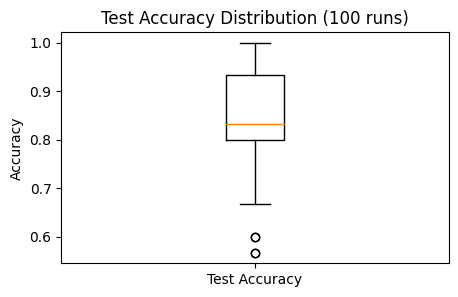

In [38]:
n_runs = 100
plot_accuracy_distribution(NeuralNetwork, X_train, y_train, X_test, y_test, input_size, output_size, learning_rate, epochs, n_runs)
